<a href="https://colab.research.google.com/github/stellagerantoni/learning-time-series-counterfactuals/blob/main/traffic_lights_WorkingOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

In [ ]:
!ls "/content/drive/MyDrive/"

 1497636324905991.pdf
 20180529193743463.pdf
'6 δεκ. 2020.gdoc'
 Classroom
'Colab Notebooks'
 --CV-3.pdf
 cv-en.gdoc
'eisigisi teliko workshop.docx'
 Fisiki-2-Ilektromagnitismos-Arnos.pdf
'Grammiki Algevra - Arnos (1).pdf'
'Grammiki Algevra - Arnos.pdf'
 GTSRB-Training_fixed.zip
'istoriko ARAS.pdf'
 kommata-kai-koinonikes-symmaxies1.pdf
 Lenin_Kratos_kai_epanastasi.pdf
 MELETH-41.pdf
 Merikes-Diaforikes-Eksisosis-Gkaroutsos.pdf
 mycourses.ntua.gr.pdf
'Olokliromata - Gkaroutsos.pdf'
 presentations_2019_20.rar
 shmeivseis-Piuanothtes_2015.rar
 stella.xlsx
'Untitled document.gdoc'
 απεργείς.gdoc
'Αριστερη Συσπειρωση Νο1.pdf'
 ΑΣ-ΑΣΦ.pdf
'Α Συνδιάσκεψη ΑΡΑΣ.pdf'
'Βασικές αρχές ΑΡΑΣ.doc'
'Βασικές ένοιες του ιστορικού υλισμού - Χαρνεκερ.pdf'
'Για τη σύγχρονη νεολαία και τα χαρακτηριστικά της ΑΣ 2014.pdf'
 διαγραφές-Τζιρτζιλακης.gdoc
 διαγραφές-Τζιρτζιλακης.odt
'Διαφορική Γεωμετρία - 2015 Επαναληπτική.gdoc'
 Δικογραφιες.rtf
'Έγγραφο χωρίς τίτλο (1).gdoc'
'Έγγραφο χωρίς τι

In [ ]:
!unzip "/content/drive/MyDrive/GTSRB-Training_fixed" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/GTSRB/Training/00030/00007_00024.ppm  
  inflating: /content/GTSRB/Training/00030/00007_00025.ppm  
  inflating: /content/GTSRB/Training/00030/00007_00026.ppm  
  inflating: /content/GTSRB/Training/00030/00007_00027.ppm  
  inflating: /content/GTSRB/Training/00030/00007_00028.ppm  
  inflating: /content/GTSRB/Training/00030/00007_00029.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00000.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00001.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00002.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00003.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00004.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00005.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00006.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00007.ppm  
  inflating: /content/GTSRB/Training/00030/00008_00008.ppm  
  inflating: /content/GTSRB/Traini

In [104]:
import zipfile
import csv
import numpy as np
from PIL import Image
import os


train_images = []
train_labels = []
validation_images = []
validation_labels = []
test_images = []
test_labels = []


In [105]:
root_folder = '/content/GTSRB/Training/'
for class_id in range(43):
  path = os.path.join(root_folder, str(class_id).zfill(5))
  dir_list = sorted(os.listdir(path))
  for file in dir_list[:100]:
    img = cv2.imread(os.path.join(path, file))
    resized_img = cv2.resize(img, (100, 100))
    train_images.append(resized_img)
    train_labels.append(class_id)


In [106]:
for class_id in range(43):
  path = os.path.join(root_folder, str(class_id).zfill(5))
  dir_list = sorted(os.listdir(path))
  for file in dir_list[130:150]:
    img = cv2.imread(os.path.join(path, file))
    resized_img = cv2.resize(img, (100, 100))
    test_images.append(resized_img)
    test_labels.append(class_id)

In [107]:
for class_id in range(43):
  path = os.path.join(root_folder, str(class_id).zfill(5))
  dir_list = sorted(os.listdir(path))
  for file in dir_list[100:130]:
    img = cv2.imread(os.path.join(path, file))
    resized_img = cv2.resize(img, (100, 100))
    validation_images.append(resized_img)
    validation_labels.append(class_id)


In [117]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)
train_images = train_images/255.0
test_images = test_images/255.0
validation_images = validation_images/255.0

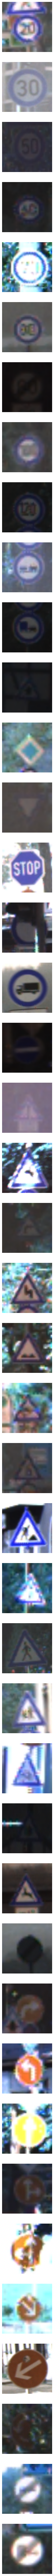

In [137]:
plt.figure(figsize=(60, 160))
count = 1
for j in range(train_images.shape[0]):
  if j %100 == 0:
    for i, image in enumerate(train_images[j:j+1]):
        plt.subplot(43, 1, count)
        plt.imshow(train_images[j])
        plt.axis('off')
        count += 1

plt.show()

In [143]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape = (100,100,3))),
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(43, activation = 'softmax'))


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])